In [63]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
df = pd.read_csv(r"OnlineRetail (1).csv", encoding='latin-1')


In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [16]:
(df.isnull().sum()/len(df))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [40]:
df.dropna(inplace=True)

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# So there is three terms on which group can be clustered
#1) Recency
#2)Frequency
#3)Monetry

In [41]:
# Attribute=Monetry
df["Amount"]=df["UnitPrice"]*df["Quantity"]
rfm_m=df.groupby("CustomerID")["Amount"].sum()
rfm_m=rfm_m.reset_index()

In [42]:
# Attribute=Frequency
rfm_f=df.groupby("CustomerID")["InvoiceNo"].count()
rfm_f=rfm_f.reset_index()
rfm_f

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [58]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [43]:
#Attribute : Recency
#converting Date Time to proper date time 
df["InvoiceDate"]=pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [46]:
max_date=df["InvoiceDate"].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [50]:
df["diff"]=max_date-df["InvoiceDate"]
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [57]:
rfm_r=df.groupby("CustomerID")["diff"].min()
rfm_r=rfm_r.reset_index()
#Extract only days
rfm_r["diff"]=rfm_r["diff"].dt.days
rfm_r

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [59]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_r, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Column Name:CustomerID


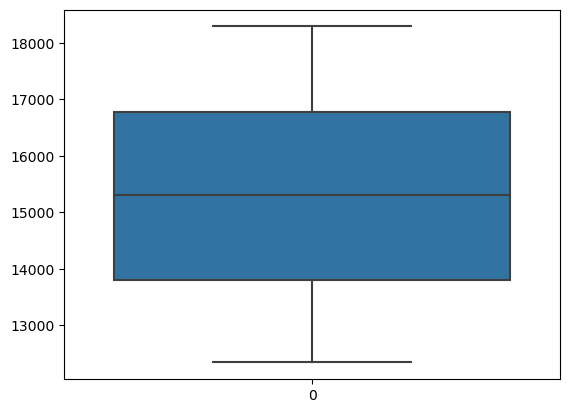

Column Name:Amount


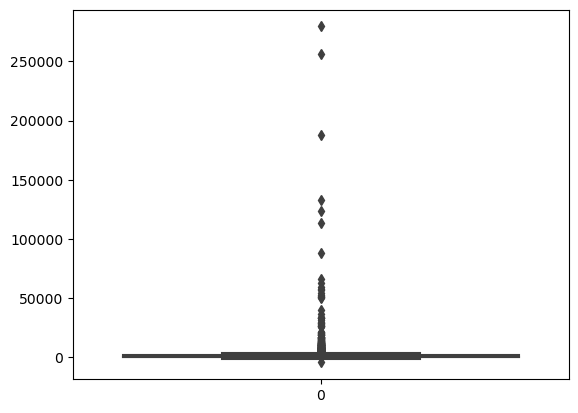

Column Name:Frequency


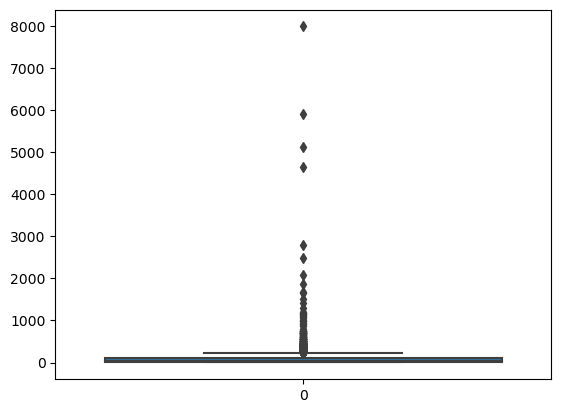

Column Name:Recency


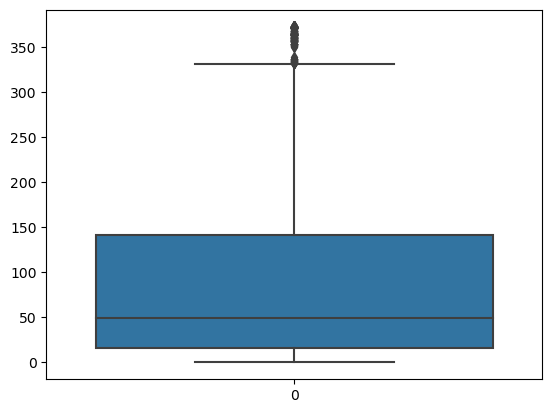

In [69]:
for i in rfm.columns:
    print(f"Column Name:{i}")
    sns.boxplot(data=rfm[i],orient="v")
    plt.show()

In [86]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [89]:
# Doing Standardization
from sklearn.preprocessing import StandardScaler

In [95]:
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm)
rfm.shape

(2369, 4)

In [96]:
rfm_scaled=rfm_scaled
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['CustomerId','Amount', 'Frequency', 'Recency']
rfm_scaled.head()

,CustomerId,Amount,Frequency,Recency
0,-1.792396,-1.728776,-0.916853,1.765515
1,-1.790059,-0.006442,-0.408571,1.621893
2,-1.788305,-1.270380,-0.849082,0.670400
3,-1.787136,0.637373,-0.544113,0.760163
4,-1.783630,-0.750692,-0.645769,1.415437


In [99]:
rfm_scaled=rfm_scaled.drop("CustomerId",axis=1)

In [100]:
rfm_scaled

,Amount,Frequency,Recency
0,-1.728776,-0.916853,1.765515
1,-0.006442,-0.408571,1.621893
2,-1.270380,-0.849082,0.670400
3,0.637373,-0.544113,0.760163
4,-0.750692,-0.645769,1.415437
...,...,...,...
2364,-1.225931,-0.679654,-0.640148
2365,-0.833101,-0.679654,-0.496526
2366,-0.798592,-0.645769,1.334650
2367,-1.312511,-0.747425,0.463944


In [ ]:
#Building The Model

In [103]:
Kmeans=KMeans(n_clusters=4,max_iter=50)

In [107]:
model=Kmeans.fit(rfm_scaled)

D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
model.labels_

array([2, 2, 2, ..., 2, 2, 0])

In [115]:
# Finding the optimal number of clusters
ssd=[]
range_cluster=[2,3,4,5,6,7,8]
for num_clusters in range_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)

    ssd.append(kmeans.inertia_)

D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_k

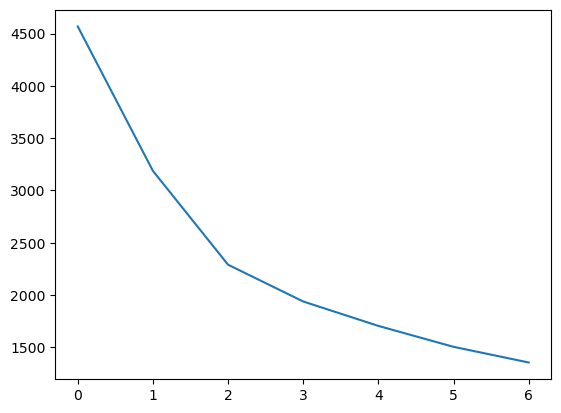

In [117]:
plt.plot(ssd);

In [119]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)

D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [120]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 2])

In [121]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.0,2,325,0
4,12350.0,334.4,17,309,0
6,12353.0,89.0,4,203,0
8,12355.0,459.4,13,213,0
14,12361.0,189.9,10,286,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

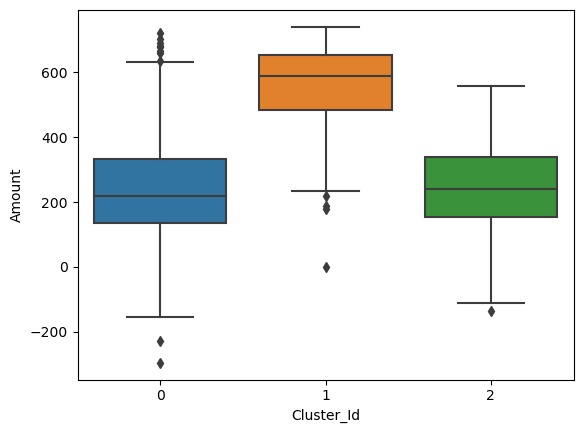

In [122]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

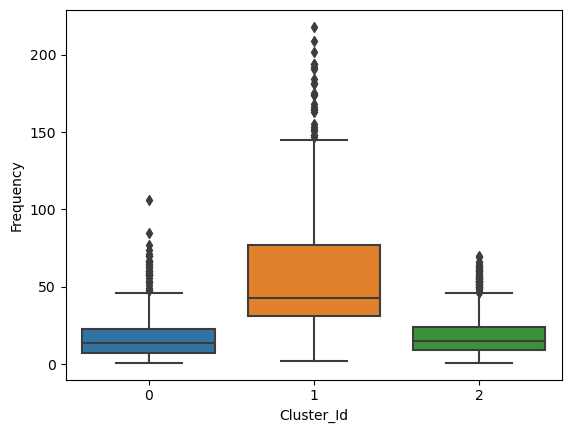

In [123]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

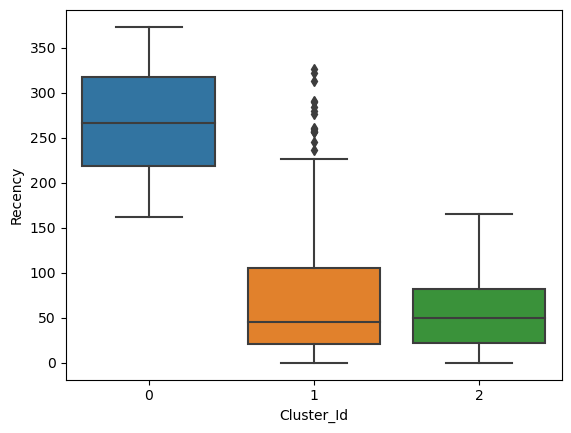

In [124]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_k

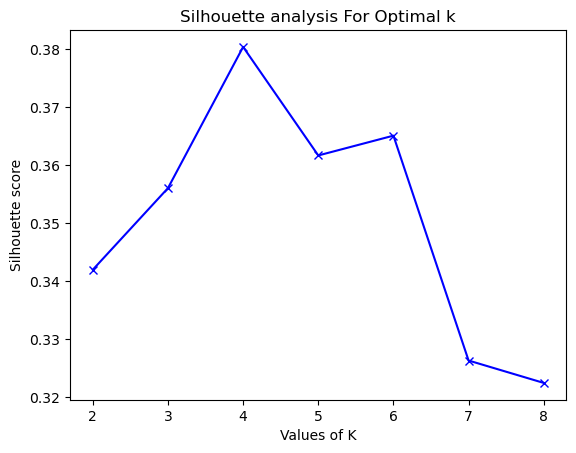

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(rfm_scaled)
  cluster_labels = kmeans.labels_
  silhouette_avg.append(silhouette_score(rfm_scaled, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [128]:
#So Final Model fit with Cluster=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [129]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 2])

In [130]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.0,2,325,0
4,12350.0,334.4,17,309,0
6,12353.0,89.0,4,203,0
8,12355.0,459.4,13,213,0
14,12361.0,189.9,10,286,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

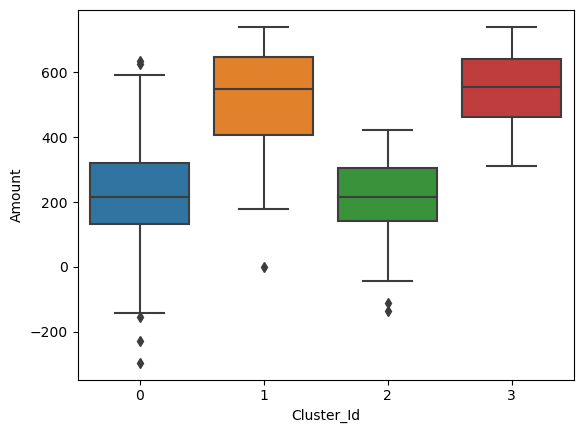

In [131]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

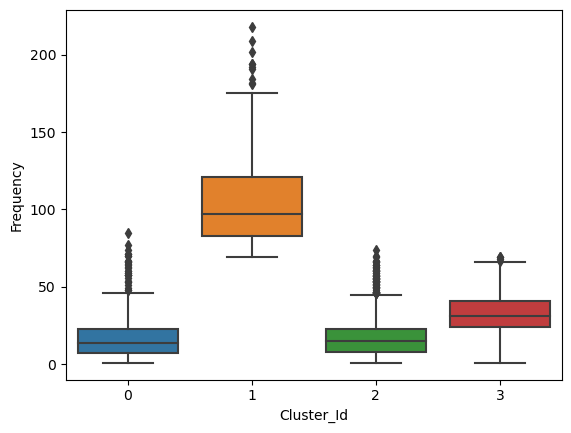

In [132]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

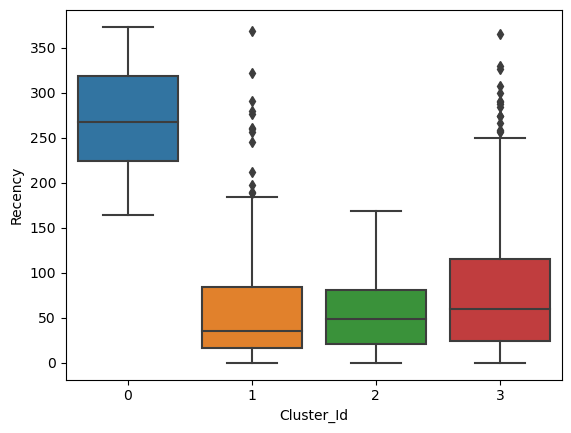

In [133]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

**Inference:
K-Means Clustering with 3 Cluster Ids

**Customers with Cluster Id 0 are the customers with high recency with moderate transaction Amount
Customers with Cluster Id 1 are frequent buyers with high amount.
Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

**K-Means Clustering with 4 Cluster IDs

**Customers with cluster id 0 are - less frequent buyers with high recency and moderate transaction amount.
Customers with cluster id 1 are - Frequent Buyers with less recency and higher transaction amount.
Customers with cluster id 2 are - less Frequent Buyers with less recency and moderate transaction amount.
Customers with cluster id 3 are - less Frequent Buyers with moderate recency and higher transaction amount.

